Consider the system of equations \\[ F(x) =\left( \begin{array}{c} x_1^2 -x_1x_2 + x_2^2 - 21\\ x_1^2 +2x_1x_2 - 8x_2^2 \end{array} \right) =0.\\]
It has four solutions: \\[ x^\star(b)= \left( \begin{array}{c} -2/\sqrt{7} \\ -\sqrt{7} \end{array} \right), \quad x^\star(g)= \left( \begin{array}{c} 2/\sqrt{7} \\ \sqrt{7} \end{array} \right), \quad x^\star(w)= \left( \begin{array}{c}  -4 \\ 1 \end{array} \right), \quad x^\star(z)= \left( \begin{array}{c}  4 \\ -1 \end{array} \right). \\]

We apply Newton's method to this problem, starting from different points. To visualize the process, we take on the following convention:
1. if Newton's method, when starting from the point $x_0$, converges toward the solution $x^\star(b)$, the point $x_0$ is colored in red;
2. if Newton's method, when starting from the point $x_0$, converges toward the solution $x^\star(g)$, the point $x_0$ is colored in blue;
3. if Newton's method, when starting from the point $x_0$, converges toward the solution $x^\star(w)$, the point $x_0$ is colored in yellow;
3. if Newton's method, when starting from the point $x_0$, converges toward the solution $x^\star(z)$, the point $x_0$ is colored in pink;


In [9]:
import numpy as np

from scipy import linalg
def newtonNVariables(obj,x0,eps,maxiter=100):
    xk = x0
    (f,J) = obj(xk)
    k = 0
    iters = list()
    iters.append([k,xk,f,J])
    while linalg.norm(f) > eps and k < maxiter:
        # We need to enforce the column vector shape
        d = linalg.solve(J,-f).reshape(2,1)
        xk = xk + d
        (f,J) = obj(xk)
        k += 1
        iters.append([k,xk,f,J])
    return (xk,iters)

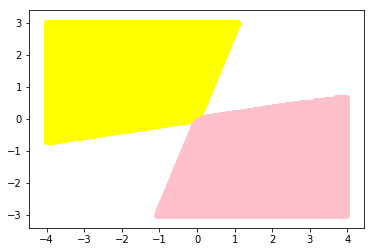

In [10]:

x1 = np.arange(-4,4,0.05)
x2 = np.arange(-3,3,0.05)
def func(x):
    f = np.array([x.item(0)**2 - x.item(0)*x.item(1) + x.item(1)**2 -21, x.item(0)**2 +2*x.item(0)*x.item(1) - 8*x.item(1)**2])
    J = np.array([[2*x.item(0)-x.item(1), -x.item(0)+2*x.item(1)],[ 2*x.item(0)+2*x.item(1), 2*x.item(0)-16*x.item(1)]])
    return (f,J)

eps = 10**(-15)

import matplotlib.pyplot as plt

black = list()
for i in x1:
    for j in x2:
        x0 = np.array([[i,j]]).T
        (f,J) = func(x0)
        if np.linalg.det(J)==0:
            black.append(x0)
        else:
            (x,iters) = newtonNVariables(func,x0,eps,1000)
            if np.linalg.norm(x-np.array([[-2/np.sqrt(7),-np.sqrt(7)]]).T) <= eps:
                plt.scatter(x0[0],x0[1], c='red')
            if np.linalg.norm(x-np.array([[2/np.sqrt(7),np.sqrt(7)]]).T) <= eps:
                plt.scatter(x0[0],x0[1], c='blue')
            if np.linalg.norm(x-np.array([[-4,1]]).T) <= eps:
                plt.scatter(x0[0],x0[1], c='yellow')
            if np.linalg.norm(x-np.array([[4,-1]]).T) <= eps:
                plt.scatter(x0[0],x0[1], c='pink')

plt.show()
